# Dynamique proies-prédateurs
Le changement climatique est une problématique au coeur du 21ème siècle, qui implique des modifications des différents écosystèmes, perturbant ainsi les populations animales et végétales qui y vivent. Entre autres, l'introduction d'une espèce exotique envahissante fait partie des perturbations qu'un milieu peut subir, en réponse à l'action humaine mais aussi à cause du changement climatique qui force certaines espèces à migrer pour survivre. Ces dynamiques de populations qui perturbent l'ensemble de l'équilibre naturel des différents milieux sont responsables de la perturbation des dynamiques entre proies et prédateurs d'un même milieu, pouvant conduire à l'extinction ou du moins la mise en danger d'une ou de plusieurs espèces. Ainsi, nous avons fait le choix d'étudier l'évolution de l'effectif des populations dans un milieu selon certains paramètres qui caractérisent ces espèces, avec l'aide d'un modèle dynamique, afin de répondre à la problématique suivante: 
Dans quelle mesure les changements climatiques perturbent-ils la stabilité des systèmes proies-prédateurs ?

## I\ Équations du modèle de Lotka-Volterra
En effectuant des recherches, nous avons trouvé ces équations différentielles qui permettent d'obtenir une variation de population en fonctions des paramètres détaillés ultérieurement : 
EDO: $$
\frac{dx}{dt} = b x - h x y \\
\frac{dy}{dt} = \epsilon h x y - d y
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Définition des paramètres initiales

- x la densité de proies
- y la densité de prédateurs
- a le taux de reproducion des proies (constant)
- b le taux de mortalité des proies dû aux prédateurs
- c le taux de mortalité des prédateurs (constant)
- d le taux de conversion de la densité de proies en densité de prédateurs

In [3]:
#Initialisation des paramétres initiaux
# Paramètres
b = 1
h = 0.005
e = 0.8
d = 0.6
# Conditions initiales
x0 = 100
y0 = 50
steps = 100000
dt = 0.001

In [4]:
#Implémentatio de l'EDO

def dx_dt(x,y):         #x correspond a la population de proies
    return b * x - h * x * y

def dy_dt(x, y):       #y correspond a la population de prédateurs
    return e * h * x * y - d * y

In [5]:
#Intégration de l'EDO : discrétisation de la variable temps

def lotka_volterra(x, y, dt):
    dx = dt*dx_dt(x, y)
    dy = dt*dy_dt(x, y)
    x = x + dx
    y = y + dy
    return x, y

In [6]:
# Affichage graphique de l'évolution des populations en fonction du temps

#fonction intermédiaire : liste des valeurs de t, x et y en fonction du temps (méthode d'Euleur)

def liste(x0, y0, dt, steps): 
    t=np.arange(0, dt*steps, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = x0
    y[0] = y0
    for i in range(1, steps):
        x[i]= lotka_volterra(x[i-1], y[i-1], dt)[0]
        y[i]= lotka_volterra(x[i-1], y[i-1], dt)[1]
    #print(t, x, y)
    return t, x, y


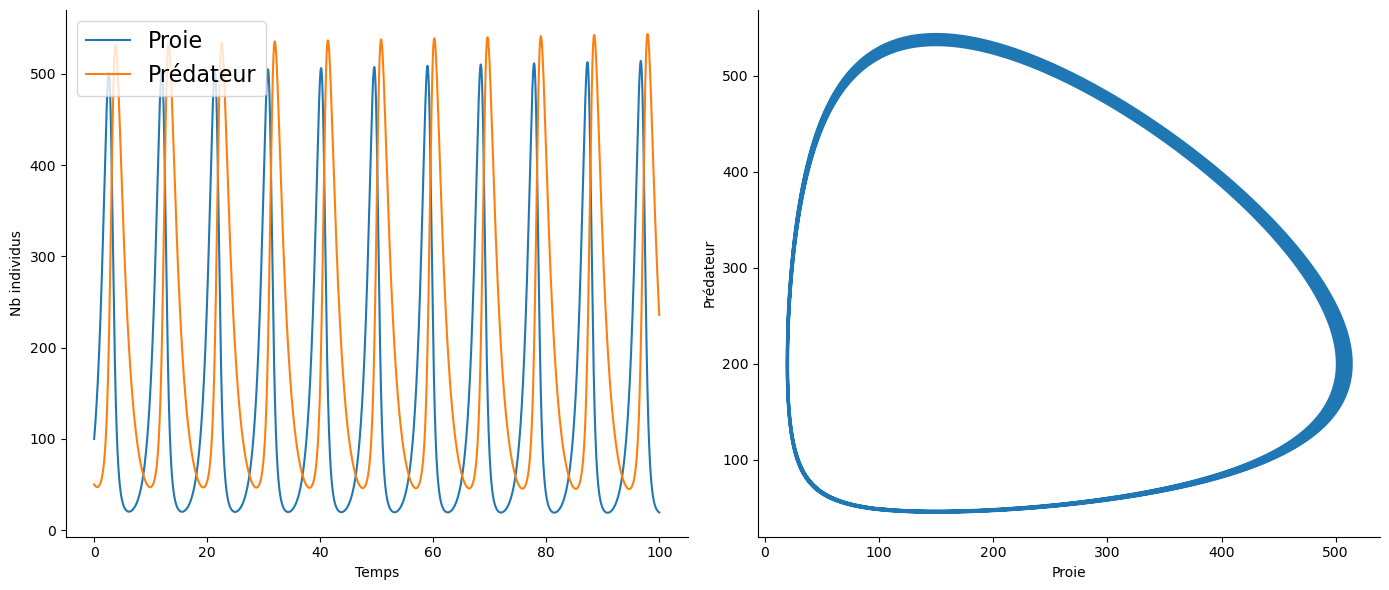

In [7]:
#Fonction principale : 
def display_lotka_volterra(x0, y0, dt, steps):
    t, x, y = liste(x0, y0, dt, steps)
    fig, axs = plt.subplots(1,2,figsize=(14, 6))
    axs[0].plot(t, x)
    axs[0].plot(t, y)
    axs[0].set(xlabel='Temps', ylabel='Nb individus')
    axs[0].legend(['Proie', 'Prédateur'], fontsize=16)
    axs[1].plot(x, y)
    axs[1].set(xlabel='Proie', ylabel='Prédateur')

    fig.tight_layout()
    sns.despine()

display_lotka_volterra(x0, y0, dt, steps)


On remarque que l'évolution des indidus du système en fonction du temps est périodique.Ceci est cohérent avec la réalité biologique : lorsque les proies sont nombreuses, les prédateurs prospèrent jusqu'a épuiser leurs ressources. Lorsque la population prédatrice a suffisamment diminué, les proies se reproduisent et leur population augmente.Ce cycle se reproduit à l'infini dans des conditions normales.

## Équilibre du système

Le système est à l'équilibre lorsque les taux de croissance des populations de proies et prédateurs sont nuls, c'est à dire lorsque les dérivées respectives s'annulent. Autrement dit:
$$
x (b - hy) = 0 \\
y (\epsilon h x - d) = 0
$$

Une solution triviale à ce système est le couple (x, y) = (0, 0). Cette solution correspond à l'extinction des deux espèces. On s'intéresse au couple de solution positif du système ($x^*, y^*$) tel que: 
$$
x = \frac{d}{\epsilon h} \\
y = \frac{b}{h}
$$

0.0 0.0


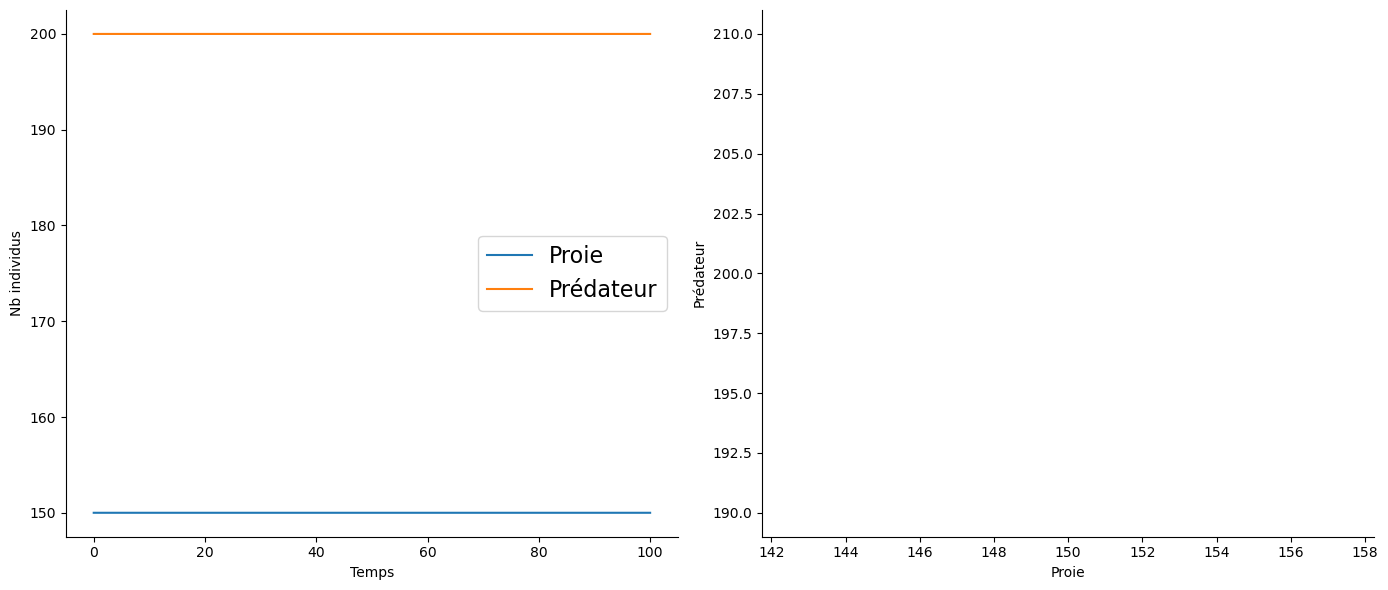

In [8]:
#On vérifie par un calcul la solution à l'équilibre : dx_dt et dy_dt s'annulent à l'équilibre
x_eq = d/(e*h)
y_eq = b/h
print(dx_dt(x_eq, y_eq), dy_dt(x_eq, y_eq))

#Affichage de l'équilibre
display_lotka_volterra(x_eq, y_eq, dt, steps)

-1.5150000000000148 1.2120000000000033


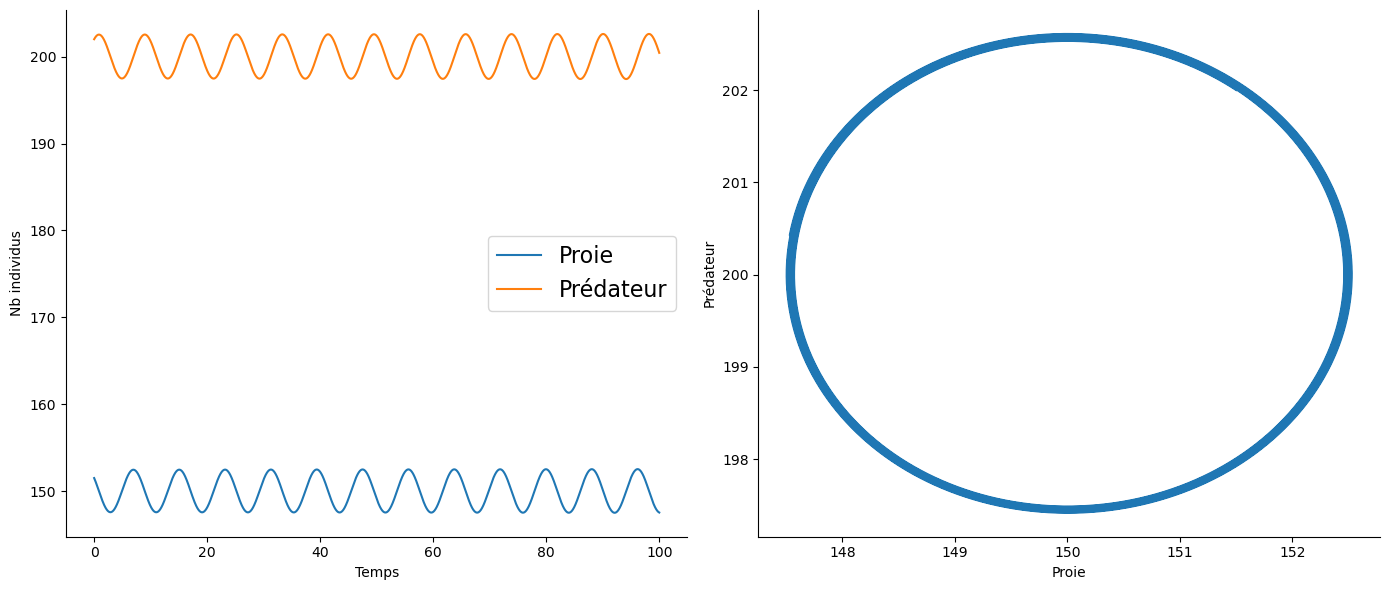

In [9]:
#On introduit une perturbation légère aux valeurs d'équilibre:
x_pert = x_eq*1.01
y_pert = y_eq*1.01
print(dx_dt(x_pert, y_pert), dy_dt(x_pert, y_pert))

#Affichage de l'équilibre
display_lotka_volterra(x_pert, y_pert, dt, steps)

Puisque la dérivée dx/dt est négative et dy/dt positive, la fonction modélisant l'évolution de la population de proie est décroissante tandis que celle des prédateurs croissante. Le système n'est pas à l'équilibre mais converge vers un état stable(??)

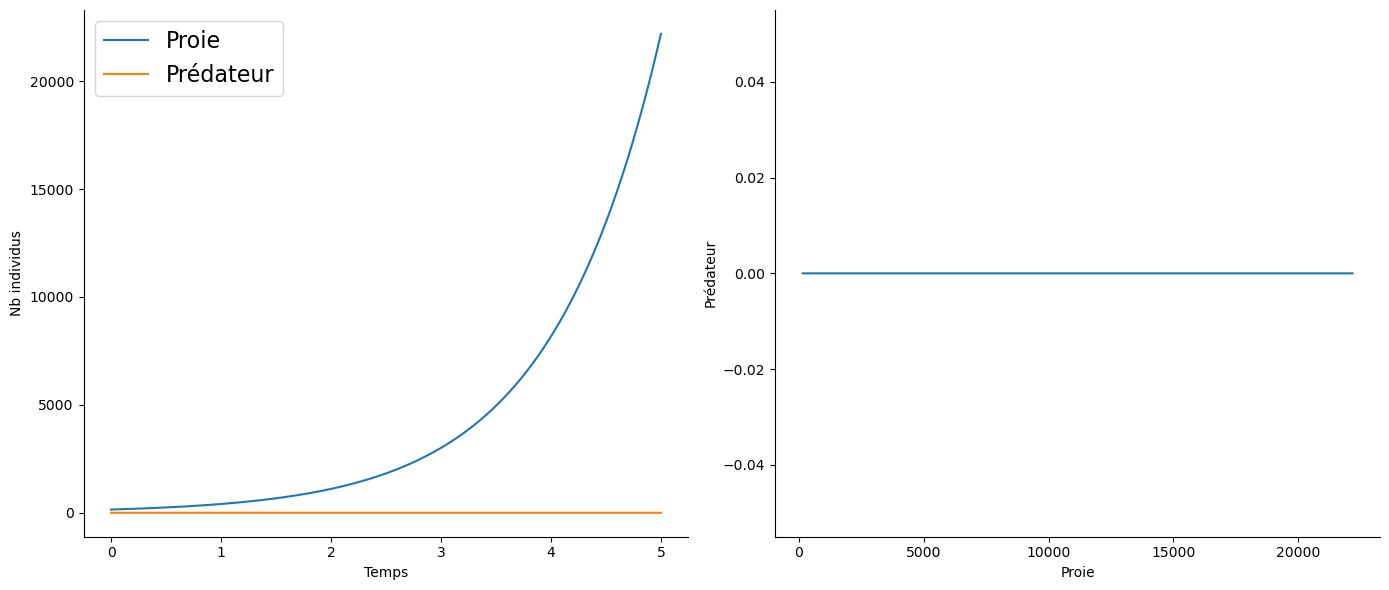

In [10]:
#extinction aléatoire d'une des deux espèces :
#a) extinction du prédateur:
display_lotka_volterra(x_eq, 0, dt, 5000)

Lorsque la population de prédateurs s'éteint, la population de proie croit de manière exponentielle.

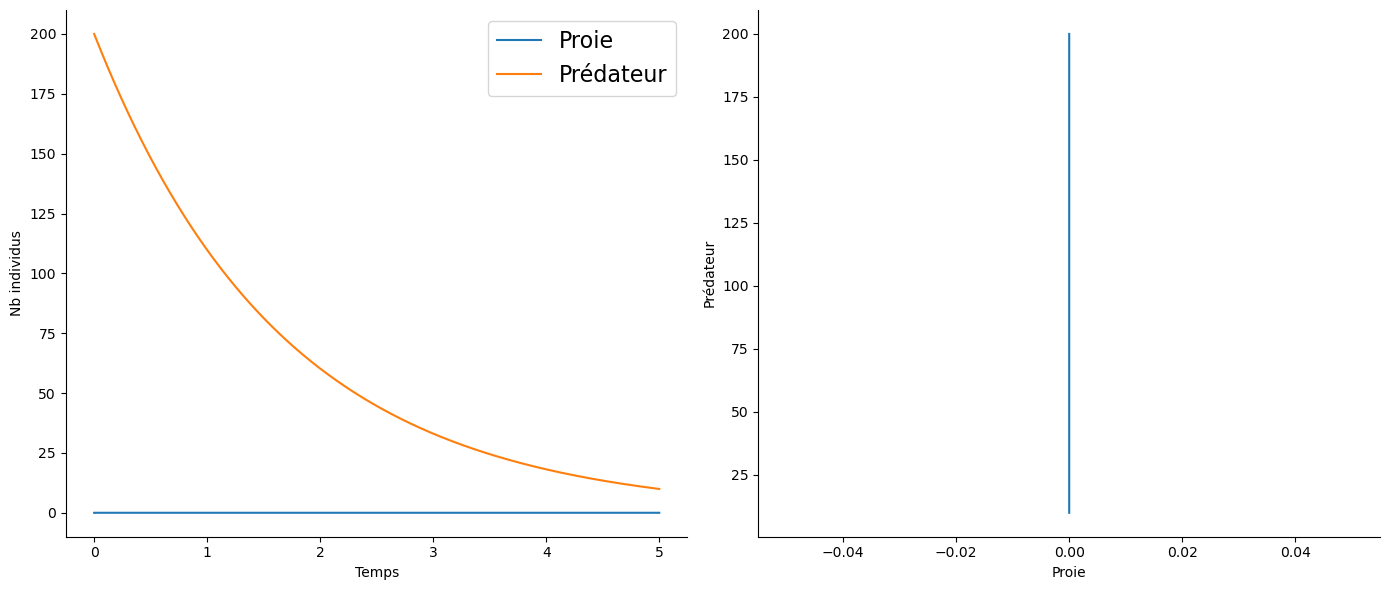

In [11]:
#a) extinction de la proie:
display_lotka_volterra(0, y_eq, dt, 5000)

Inversement, lorsque la population de proie s'éteint, les prédateurs s'éteignent à leur tour s'ils ne trouvent d'autres mode d'alimentation.

## II\ Perturbation du modèle
### Introduction d'une espece invasive dans le modèle
On introduit maintenant une 3ème espèce dans le modèle. Par exemple : cas des espèces invasives induit par l'activité humaine. Les équations différentielles sont les suivantes :

$$
\frac{dx}{dt} = b x - h x y - k x z\\
\frac{dy}{dt} = \epsilon h x y - d y - l y z \\
\frac{dz}{dt} =  - m z + n y z
$$
avec :
- l le taux de prédation de l'espèce introduite
- m le taux de mortalité de l'espèce introduite
- n le taux de conversion de la densité de prédateur en densité de l'espèce introduite

On note A et B les espèces proie et prédatrice du modèle à deux espèces, C l'espèce introduite. La fonction z représente l'espèce C.On soustrait aux quantités A et B les individus chassés par l'espèce C (resp. -kxz et -lyz). L'équation de C est analogue à l'équation de B dans le modèle à deux espèces.

In [12]:
#initialisation des nouvelles variables
b = 1
h = 0.005
e = 0.8
d = 0.6
k=h
l=2*h
m=d
n=e*l
# Conditions initiales
x0 = 20
y0 = 10
z0 = 5
steps = 30000
dt = 0.001

In [13]:
#implémentation de l'EDO

def nv_dxdt(x,y, z, l):         
    return b * x - h * x * y - k * x * z

def nv_dydt(x, y, z, l):       
    return e * h * x * y - d * y - l * y * z

def nv_dzdt(x, y, z):
    return n * y * z - m * z

In [14]:
#intégration de l'EDO : méthode d'Euler

def nv_lotka_volterra(x, y, z, l, dt):
    dx = dt*nv_dxdt(x, y, z, l)
    dy = dt*nv_dydt(x, y, z, l)
    dz = dt*nv_dzdt(x, y, z)
    x = x + dx
    y = y + dy
    z = z + dz
    return x, y, z

In [15]:
#Affichage de l'évolution des densités de population en fonction du temps
#fonction intermédiaire
def nv_liste(x0, y0, z0, h, dt, steps): 
    t=np.arange(0, dt*steps, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(1, steps):
        x[i]= nv_lotka_volterra(x[i-1], y[i-1], z[i-1],l, dt)[0]
        y[i]= nv_lotka_volterra(x[i-1], y[i-1], z[i-1],l, dt)[1]
        z[i]= nv_lotka_volterra(x[i-1], y[i-1], z[i-1],l, dt)[2]
    return t, x, y, z

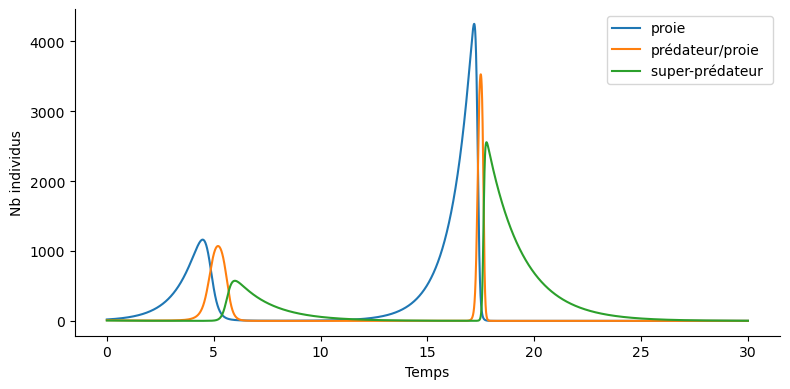

In [16]:
#fonction prinicipale :

def display_nv_lotka_volterra(x0, y0, z0, h, dt, steps):
    t, x, y, z = nv_liste(x0, y0, z0, h, dt, steps)
    fig = plt.figure(figsize=(8, 4))
    plt.plot(t, x, label = 'proie')
    plt.plot(t, y, label = 'prédateur/proie')
    plt.plot(t, z, label = 'super-prédateur ')
    plt.xlabel('Temps')
    plt.ylabel('Nb individus')
    plt.legend()
    plt.show
    sns.despine()
    plt.tight_layout()
    

display_nv_lotka_volterra(x0, y0, z0, h, dt, steps)

En prenant pour paramètres initiaux k=h, l=h et z0<<y0 : le résultat obtenu est cohérent. Les fonctions sont périodiques.
On remarque cependant une explosion de la densité de proies.

On remarque aussi que le système à 3 espèces est très sensible aux paramètres initiaux. En particulier, les conséquences sur les densité de population des espèces sont drastiquement différentes en faisant varier le taux de prédation de l'espèce introduite. Par exemple : si le prédateur introduit se contente de chasser une seule des deux espèces, par exemple le prédateur du 1er modèle, la population A de proie atteint un pic de 400 000 individus contre 500 dans des conditions normales et sur un même laps de temps. Idem pour le super-prédateur. Tandis que le prédateur intermédiraire s'éteint. Ceci permet de comprendre les conséquences destructrices que peut avoir l'invasion biologique sur les écosystèmes, surtout quand elle est causée par l'Homme.

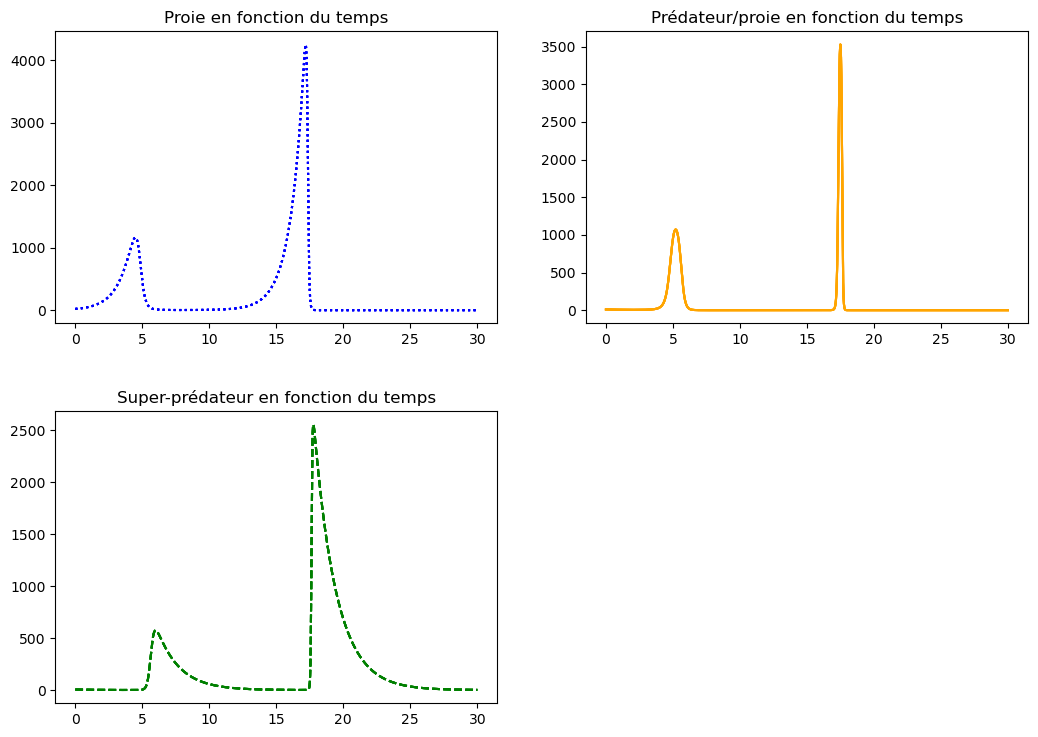

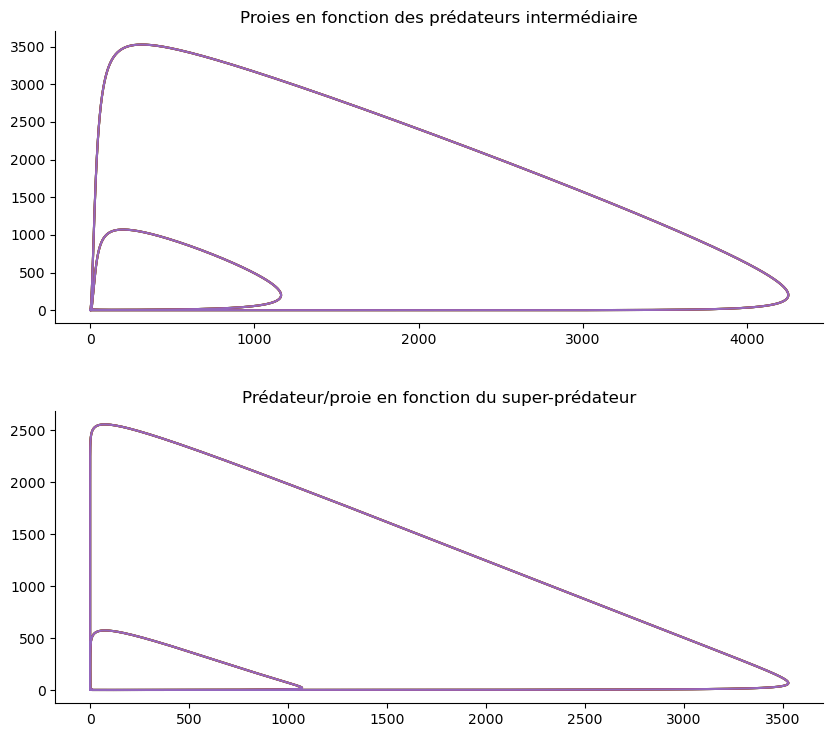

In [17]:
#Affichage des densités des 3 espèces en fonction du taux de prédation de l'espce introduite
def lala(x0, y0, z0, h, dt, steps):
    t, x, y, z = nv_liste(x0, y0, z0, l, dt, steps)
        
    T=[]
    X=[]
    Y=[]
    Z=[]
    
    for i in np.linspace(-5*h, 5*h, num=5):
        t, x, y, z=nv_liste(x0, y0,z0, i, dt, steps)
        T.append(t)
        X.append(x)
        Y.append(y)
        Z.append(z) 
    fig, axs = plt.subplots(2, 2)
    for i in range (len(T)):
        axs[0, 0].plot(T[i], X[i],"b:",)
        axs[0, 1].plot(T[i], Y[i],'orange')
        axs[1, 0].plot(T[i], Z[i], "g--")
        axs[0, 0].set_title("Proie en fonction du temps")
        axs[0, 1].set_title("Prédateur/proie en fonction du temps")
        axs[1, 0].set_title("Super-prédateur en fonction du temps")
    fig.tight_layout()
    fig.delaxes(axs[1,1])
    fig.subplots_adjust(left=0.08, bottom=0.1, right=1.6, top=1.5, wspace=0.2, hspace=0.3)
    
    FIG, (ax1, ax2) = plt.subplots(2,1)
    for i in range(len(X)):
        ax1.plot(X[i], Y[i])
        ax1.set_title("Proies en fonction des prédateurs intermédiaire")
    for i in range(len(Y)):
        ax2.plot(Y[i], Z[i])
        ax2.set_title("Prédateur/proie en fonction du super-prédateur")
    FIG.tight_layout()
    FIG.subplots_adjust(left=0.3, bottom=0.1, right=1.5, top=1.5, wspace=0.2, hspace=0.3)
    sns.despine()

lala(x0, y0, z0, h, dt, steps)


# Équilibre du système à 3 espèces

## Points d'équilibre :

On cherche les triplet de solutions *(x, y, z)* telw que le système soit à l'équilibre, autrement dit tel que:

$$
b x - h x y - k x z = 0 \\
\epsilon h x y - d y - l y z = 0\\
- m z + n y z = 0
$$

In [18]:
# On utilise la méthode sympy.solve pour la résolution des équations plus complexes
import sympy
from sympy.solvers import solve
from sympy import Symbol

In [19]:
# Définition du système d'équations différentielles
x, y, z = sympy.symbols('x y z')
f1 = b * x - h * x * y - k * x * z
f2 = e * h * x * y - d * y - l * y * z
f3 = n * y * z - m * z

# Calcul des points d'équilibre
equilibre = sympy.solve([f1, f2, f3], [x, y, z])

# Affichage des solutions : 
print("Solutions d'équilibre :")
for eq in equilibre:
    print(eq)

Solutions d'équilibre :
(0.0, 0.0, 0.0)
(0.0, 75.0000000000000, -60.0000000000000)
(150.000000000000, 200.000000000000, 0.0)
(462.500000000000, 75.0000000000000, 125.000000000000)


- Le 1er triplet de solution vaut pour des densités de population nulles. 
- Le 2ème n'a pas de sens physique car h est un parametre positif ou nul donc -100*h<0. Or un nombre d'individu ne peut pas être nul. 
- Le 3ème triplet montre que le système est à l'équilibre pour des valeurs x et y fixées et lorsque la population de l'espèce introduite est nulle (modèle 1). 
- Enfin le triplet 4 semble cohérent.

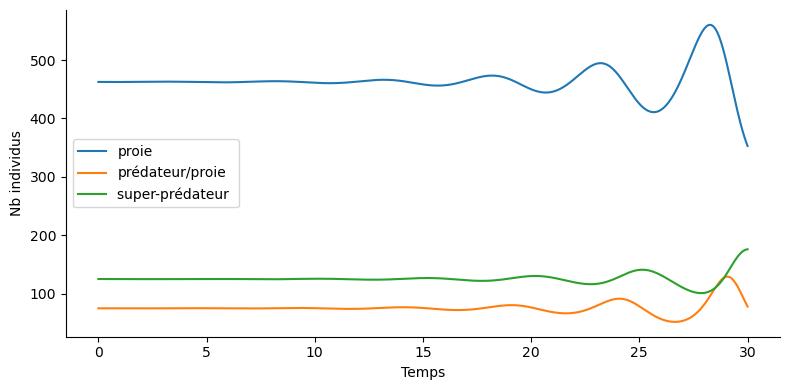

In [26]:
# Définition d'une fonction qui prend en entrée les paramètres du système et renvoie le triplet de solutions tel que tous les éléments sont strcitement positifs : : 

def eq_value (b, h, e, l, m, n, k):
    equilibre = sympy.solve([f1, f2, f3], [x, y, z])
    for triplet in equilibre :
        positif = True
        for eq in triplet :
            if eq <= 0 :
                positif = False
                break
        if positif :
            return triplet
eq1, eq2, eq3 = eq_value (b, h, e, l, m, n, k)
eq3=1.001*eq3

# Affichage graphique de l'équilibre :

display_nv_lotka_volterra(eq1, eq2, eq3, h, dt, steps )

## Stabilité du système :

Pour étudier la stabilité de l'équilibre de ce système, on introduit la matrice jacobienne associée au système étendu de Lotka Volterra, c'est à dire la matrice des dérivées partielles du 1er ordre des composantes de l'EDO. La matrice jacobienne permet de calculer les taux de variations des différents paramètres, elle est donnée par :
$$
\mathbf{J}(x, y, z) = 
\pmatrix{
    \frac{\partial f1}{\partial x} & \frac{\partial f1}{\partial y} & \frac{\partial f1}{\partial z} \\
    \frac{\partial f2}{\partial x} & \frac{\partial f2}{\partial y} & \frac{\partial f2}{\partial z} \\
    \frac{\partial f3}{\partial x} & \frac{\partial f3}{\partial y} & \frac{\partial f3}{\partial z} \\
} = 
\pmatrix{
    b - h y - k z & -h x & - k x \\
    \epsilon h y & \epsilon h x - d - l z & - l y\\
    0 & n z & n y - m\\
}
$$

La jacobienne donne des informations sur la stabilité du système et la trajectoire autour du point d'équilibre.
Il existe 4 types d'équilibre qui définissent la trajectoire du système autour de ce point : les cols, les noeuds, les foyers et les centres.

## Trajectoire au tour des points d'équilibre : 

Le type d'equilibre d'un systeme est donné par le théorème de classification de l'équilibre :

1. Si $det(J) < 0$ l’equilibre est un col : les solutions semblent se rapprocher de l’equilibre mais elles l’evitent et finalement s’en  ́eloignent.

2. Si $tr(J) = 0$ et $det(J) > 0$ l’equilibre est un centre. Les deux populations oscillent de facon periodique autour de l’equilibre.

3. Si $tr(J) \neq 0$ et $det(J) > tr(J)^2/4$ l’ ́equilibre est un foyer : les deux populations oscillent encore mais en se rapprochant ou en s’eloignant de l’equilibre selon qu’il s’agisse d’un foyer stable (ou attractif ) ($tr(J) < 0$) ou d’un foyer instable (ou repulsif) ($tr(J) > 0$).

4. Si $0 < det(J) < tr(J)^2/4$ l’equilibre est un nœud : les deux populations tendent, sans osciller cette fois, vers l’equilibre (cas stable ou attractif, $tr(J) < 0$) ou bien s’en  ́ecartent sans oscillation (cas instable ou repulsif, $tr(J) > 0$).

5. Enfin le cas $det(J) = tr(J)^2/4$ correspond a des nœuds degeres (stables ou instables).

In [28]:
# On cherche à obtenir le type d'équilibre du système étendu de Lotka Volterra :

# Défintion de la fonction equilibre qui prend en entrée les paramètres du système et retourne le type d'équilibre de celui-ci:

# Fonction intermédiaire :
# Définition de la fonction Jac qui retourne la matrice jacobienne du système en fonction des paramètres de celui ci

def Jac(x, y, z, b, h, e, l, m, n, k):
    return np.array([[b - h*y - k*z, -h*x, -k*x],
                  [e*h*y, e*h*x - d - l*z, -l*y],
                  [0, n*z, n*y - m]])


# Fonction principale : 
def equilibrum_type(x, y, z, b, h, e, l, m, n, k):
    jac_ = Jac (x, y, z, b, h, e, l, m, n, k)
    jac_ = np.array(jac_, dtype=float)
    d_ = np.linalg.det(jac_)
    t_ = np.trace(jac_)
    if d_<0 : 
        print(f'L\'équilibre est un col')
    elif (t_==0) and (d_>0):
        print(f'L\'équilibre est un centre')
    elif d_>((t_**2)/4) :
        if t_>0 :
            print(f'L\'équilibre est un foyer répulsif')
        elif t_<0 :
            print(f'L\'équilibre est un foyer attractif')
    elif 0<d_<((t_**2)/4) :
        if t_>0 :
            print(f'L\'équilibre est un noeud répulsif')
        elif t_<0 :
            print(f'L\'équilibre est un noeud attractif')
    elif d_==((t_**2)/4) :
        print(f'L\'équilibre est un noeud dégénéré')

equilibrum_type(eq1, eq2, eq3, b, h, e, l, m, n, k)

jac_ = Jac (eq1, eq2, eq3, b, h, e, l, m, n, k)
jac_ = np.array(jac_, dtype=float)
d_ = np.linalg.det(jac_)
#t_ = np.trace(jac_)
#eig= np.linalg.eigvals(jac_)
print(eig)

L'équilibre est un col
[-0.42730072+0.j          0.21271286+1.25739363j  0.21271286-1.25739363j]


In [38]:
#AFFICHE 3D
from matplotlib import cm
def affiche_3d(x0, y0, z0, h, dt, steps):
    T=[]
    X=[]
    Y=[]
    Z=[]
    
    for i in np.linspace(-5*h, 5*h, num=5):
        t, x, y, z=nv_liste(x0, y0,z0, i, dt, steps)
        T.append(t)
        X.append(x)
        Y.append(y)
        Z.append(z) 

    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_trisurf(X, Y, Z, vmin=z.min() * 2, cmap=cm.Blues)

    ax.set(xticklabels=[],
           yticklabels=[],
           zticklabels=[])

    plt.show()
#affiche_3d(x0, y0, z0, h, dt, steps)